In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

In [3]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [4]:
y

tensor([1., 5., 2., 5.])

In [5]:
M1 = nn.Linear(2,8, bias=False)
M1

Linear(in_features=2, out_features=8, bias=False)

In [6]:
M1(x)

tensor([[ 2.0765, -0.0974, -2.0878, -3.7532,  0.8555,  1.5439, -0.5803, -3.2271],
        [ 1.9570,  0.0654, -1.7844, -3.1398,  0.6341,  1.3820, -0.4262, -2.6926],
        [ 2.1587,  1.1566, -0.7041, -0.7222, -0.4883,  1.0210,  0.3621, -0.5644],
        [ 4.9150,  1.4990, -2.9255, -4.5117,  0.1306,  2.8512, -0.0461, -3.8015]],
       grad_fn=<MmBackward0>)

In [7]:
M2 = nn.Linear(8,1,bias=False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [10]:
M2(M1(x)).squeeze()

tensor([ 0.2707,  0.2157, -0.0344,  0.2064], grad_fn=<SqueezeBackward0>)

In [9]:
y

tensor([1., 5., 2., 5.])

In [11]:
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(2,8,bias=False)
        self.Matrix2 = nn.Linear(8,1,bias=False)
    def forward(self,x):
        x = self.Matrix1(x)
        x = self.Matrix2(x)
        return x.squeeze()

In [12]:
f = MyNeuralNet()

In [13]:
f(x)

tensor([ 0.5725,  0.4005, -0.5170, -0.1742], grad_fn=<SqueezeBackward0>)

In [14]:
for par in f.parameters():
    print(par)

Parameter containing:
tensor([[ 0.1843,  0.3648],
        [-0.5360,  0.5805],
        [-0.3234, -0.5478],
        [ 0.2084,  0.2789],
        [ 0.1955,  0.6237],
        [-0.6362, -0.0431],
        [-0.2893,  0.5525],
        [-0.1569,  0.3933]], requires_grad=True)
Parameter containing:
tensor([[-0.0661, -0.2031,  0.0398, -0.0691,  0.1271, -0.0219, -0.1912, -0.0539]],
       requires_grad=True)


In [15]:
yhat = f(x)
yhat

tensor([ 0.5725,  0.4005, -0.5170, -0.1742], grad_fn=<SqueezeBackward0>)

In [16]:
y

tensor([1., 5., 2., 5.])

In [17]:
L = nn.MSELoss()
L(y,yhat)

tensor(13.6114, grad_fn=<MseLossBackward0>)

In [19]:
torch.mean((y-yhat)**2)

tensor(13.6114, grad_fn=<MeanBackward0>)

In [20]:
opt = SGD(f.parameters(), lr=0.001)

In [22]:
losses = []
for _ in range(50):
    opt.zero_grad()
    loss_value = L(f(x), y)
    loss_value.backward()
    opt.step()
    losses.append(loss_value.item())

Text(0.5, 0, 'Epochs')

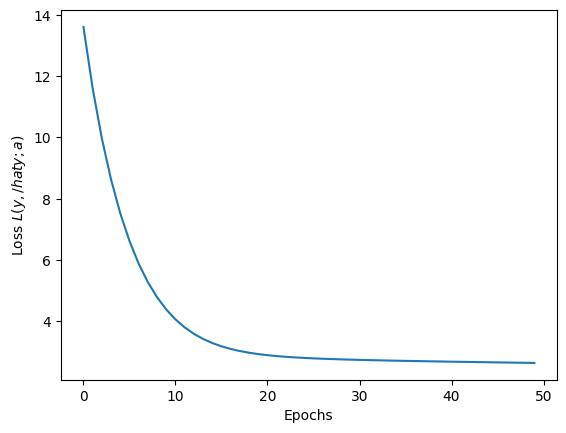

In [23]:
plt.plot(losses)
plt.ylabel('Loss $L(y,/hat{y};a)$')
plt.xlabel('Epochs')

In [24]:
f(x)

tensor([3.3355, 2.8710, 1.2869, 4.8966], grad_fn=<SqueezeBackward0>)

In [25]:
y

tensor([1., 5., 2., 5.])